<div>  
<h1><center style="background-color:#A30000; color:white;"><strong>Analyze player transition from NCAA to NBA 🏀</strong></center></h1>
</div>

![](https://cdn.dribbble.com/users/1018564/screenshots/4846543/media/3d0ea18045c83b0b0a5c8c3b077ddd02.gif)

<div class="alert alert-warning" color=black>
<p>Every year, the 30 NBA franchises try to inch closer to winning a championship and a lot
of big decisions could influence the fate of their team. One of these main decisions is the NBA
Draft where the team gets to add fresh, young talent on their roster. But what is the NBA Draft
system all about? Do all Drafted players actually make it big in the game? How do players fall
under the ‘Steals or Busts’ category?
<br><br>
This project is targeted towards visualizing the transition of college basketball players into
the NBA to understand the reasons behind their success rates in the pro league. A holistic review
of the performance of players drafted over the past 40 years shall be compared to understand
what went wrong with some of the picks. Several players of the recent 2019 draft class will be
analyzed and matched to a team they would fit best with and why. Moreover, changes in trends
of the drafts since 1974 to 2021 will be visualized on various levels. Overall, we hope that this
project will reveal underlying patterns and trends to help teams understand which player would
be a good fit on their roster to make better business decisions using different types of data
visualizations to explore an extensive array of datasets.
</p>
</div>

# Understanding the Draft

* **Draft Combine** - Evaluate physical and mental strengths, skills etc. 

* **30 teams** - Worse performing teams get better lottery picks.

* **This is fair but unjust at the same time** - Best players end up on bad teams and not very good players play on the best teams.

*This causes inconsistent distribution of players and teams. Players get waived or traded easily if they do not perform because they did not fit well in the team. 
Many mistakes have been made in the draft process which affects the Franchise.*

# MOTIVATION
#### Over the years, the draft trends have been changing. Previously in the NBA, the top picks almost always become NBA superstars and ended up being inducted into the Basketball Hall of Fame, for example - Shaquille O’Neal, Tim Duncan etc., however, in recent years, this trend has taken a turn. In the last 8 years, the top picks have been a series of busts, for example - the 2013 #1 pick by Cleveland Cavaliers, Anthony Bennett was passed on to various teams and waived off after 4 years in the NBA. Similarly, Josh Jackson who was the 4th Overall pick by Phoenix Suns was passed around 4 teams in 4 years.

#### These incoherent decisions could gravely impact an NBA franchise as most of the player trades include these draft picks as a part of the trade. One of the worst decisions in the history of professional basketball is probably the Charlotte Hornets trading the legendary shooting guard, Kobe Bryant to the Los Angeles Lakers on the day of the draft itself. One irrational decision like this could change the history of the franchise forever. This is exactly why data driven decisions could be better when it comes to drafts. This is why we have decided to break down the process of the draft and allow data to make decisions. We will gather insights from previous draft data and suggest changes to one of the most popular NBA drafts of 2019. This draft class had one of the elite, history-making players the NBA has seen and is compared to the legendary draft class of 2003 with Lebron James, Carmelo Anthony, Dwayne Wade and Chris Bosh. Every year, 60 players are drafted into the NBA from various colleges or high schools across the USA but recently the flow of international players has increased with Giannis Antetokounmpo being the first international player with a finals MVP, finals ring, 2x regular season MVPs and Defensive player of the year from Greece.

<div>  
<h3><center style="background-color:#0093AF; color:white;"><strong>Importing Libraries</strong></center></h3>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import altair as alt
alt.renderers.enable('default')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### *Let's derive some insights of the draft by understanding which state produces most basketball players*

# 1. Number of total players drafted from each US State, All Time

### Importing dataset of NBA Players by US State

In [2]:
data = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/NBA Players-by state.csv')
data.head()

,Player,Yrs,G,MP,FG,FGA,3P,3PA,FT,FTA,...,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Date,City,State
0,Michael Ansley,3,149,2143,383,746,0,0,260,360,...,0.513,NaN,0.722,14.4,6.9,4.2,0.4,"Feb 8, 1967",Birmingham,Alabama
1,Keith Askins,9,486,7983,677,1688,275,774,223,311,...,0.401,0.355,0.717,16.4,3.8,2.9,0.8,"Dec 15, 1967",Athens,Alabama
2,Carl Bailey,1,1,7,1,1,0,0,0,0,...,1,NaN,NaN,7,2,0,0,"Apr 23, 1958",Birmingham,Alabama
3,Charles Barkley*,16,1073,39330,8435,15605,538,2020,6349,8643,...,0.541,0.266,0.735,36.7,22.1,11.7,3.9,"Feb 20, 1963",Leeds,Alabama
4,Eric Bledsoe,7,380,10039,1657,3709,294,890,1042,1325,...,0.447,0.33,0.786,26.4,12.2,3.7,4.4,"Dec 9, 1989",Birmingham,Alabama


## Preprocessing the data
The data is grouped by state and the count of players from each state is calculated.

In [3]:
data = data.groupby(['State']).size().reset_index(name='Counts')

data

,State,Counts
0,Alabama,80
1,Alaska,1
2,Arizona,13
3,Arkansas,47
4,California,374
5,Colorado,17
6,Connecticut,33
7,DC,69
8,Delaware,7
9,Florida,100


In order to visualize the data using plotly, the state names had to be replaced with their official abbreviations.

In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

state_df = data.replace({"State": us_state_to_abbrev})    
state_df

,State,Counts
0,AL,80
1,AK,1
2,AZ,13
3,AR,47
4,CA,374
5,CO,17
6,CT,33
7,DC,69
8,DE,7
9,FL,100


In [5]:
fig = px.choropleth(state_df, locations='State',
                    locationmode="USA-states", color='Counts', scope="usa", title = "Number of total players drafted from each US State, All Time", color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

<div class="alert alert-warning" color=black>
    We observed that the majority of Drafted NBA players were born in the states of California, New York and Illinois.

### *Now let's understand the distribution of international player's in the NBA*

# 2. Number of total players drafted from each country excluding the US, 1963 - 2020

In [6]:
country = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/all_seasons.csv')
country.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


## Preprocessing the data

The data had multiple duplicate entries for Players for all the years that they had a change in team franchise. Hence, these had to be removed.

In [7]:
country = country.drop_duplicates(subset=['player_name'])

country.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


Grouping the dataset by countries and calculating count of all the players from each country and subsequently dropping the US from this dataframe.

In [8]:
pd.set_option('display.max_rows', None)

country_df = country.groupby(['country']).size().reset_index(name='Counts')
country_df

,country,Counts
0,Angola,1
1,Argentina,13
2,Australia,17
3,Austria,1
4,Bahamas,2
5,Belize,1
6,Bosnia and Herzegovina,4
7,Brazil,13
8,Cameroon,3
9,Canada,35


We will drop 'USA' because we want to know the distribution of international players

In [9]:
country_df = country_df.drop(labels=59, axis = 0)

In [10]:
fig = px.choropleth(country_df, locations='country',
                    locationmode="country names", color='Counts', scope="world", title = "Number of total players drafted from each country excluding the US, 1963 - 2020", color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

<div class="alert alert-warning" color=black>The majority of International players are from Canada, France and 3rd most international players are from a small country like Serbia.

### Now that we have an idea about overall trends about where the player's come from, let's analyze how the trends in **Age** over the past 30 years

# 3. Change in Ages of NBA Draft Picks, 1981 - 2020

In [11]:
country = pd.read_csv("../input/ncaa-to-nba-transition-for-2019-draft/all_seasons.csv")
country.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [12]:
country = country.drop_duplicates(subset=['player_name'])
country.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


Grouping the data by draft year and taking mean of all the numerical stats

In [13]:
k = country.groupby(['draft_year']).mean()
k.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
draft_year,,,,,,,,,,,,,
1963,24.0,187.96,86.182480,5.0,1.40,1.40,0.80,-10.80,0.0480,0.1280,0.147,0.250,0.154
1976,43.0,215.90,110.676448,43.0,3.70,2.10,0.50,14.90,0.1140,0.1300,0.201,0.514,0.082
1978,40.0,195.58,90.718400,32.0,4.00,1.30,0.70,-9.80,0.0170,0.1010,0.182,0.499,0.104
1979,39.5,205.74,96.388300,10.5,0.55,1.05,0.35,0.25,0.0865,0.1025,0.064,0.388,0.097
1980,38.0,208.28,117.933920,22.0,2.50,2.40,0.30,-0.10,0.0910,0.1920,0.164,0.440,0.049


In [14]:
k = k.iloc[8:-1]
k.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
draft_year,,,,,,,,,,,,,
1984,34.555556,203.200000,107.450905,75.777778,14.477778,6.622222,3.133333,5.400000,0.075667,0.179778,0.208889,0.552667,0.155111
1985,33.523810,202.474286,103.742970,60.857143,9.557143,4.647619,2.000000,-0.361905,0.069238,0.153286,0.181619,0.534667,0.127619
1986,33.333333,202.071111,101.529009,48.111111,5.894444,3.127778,1.705556,3.072222,0.065389,0.143778,0.159833,0.516222,0.143111
1987,31.869565,200.895652,99.151222,51.000000,8.226087,3.956522,2.486957,-4.686957,0.062217,0.155217,0.180478,0.485826,0.148696
1988,30.896552,201.273103,100.806912,55.793103,9.127586,4.003448,1.986207,-0.562069,0.059621,0.145207,0.185828,0.532414,0.135621


In [15]:
country1 = country[country['draft_year'] != 'Undrafted']

In [16]:
country1 = country1.astype({'age': 'float'})
country1 = country1.astype({'draft_year': 'int32'})

In [17]:
country1.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,TOR,22.0,198.12,102.058200,Seward County Community College,USA,1995,2,50,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,CLE,36.0,208.28,111.583632,Old Dominion,USA,1983,2,30,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97


In [18]:
country1 = country1.sort_values(by = ['draft_year'])
country1.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
7030,Jerry Smith,NJN,24.0,187.96,86.182480,Louisville,USA,1963,2,12,...,1.4,1.4,0.8,-10.8,0.048,0.128,0.147,0.250,0.154,2011-12
169,Robert Parish,CHI,43.0,215.90,110.676448,Centenary (LA),USA,1976,1,8,...,3.7,2.1,0.5,14.9,0.114,0.130,0.201,0.514,0.082,1996-97
65,John Long,TOR,40.0,195.58,90.718400,Detroit Mercy,USA,1978,2,29,...,4.0,1.3,0.7,-9.8,0.017,0.101,0.182,0.499,0.104,1996-97
236,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,1979,8,165,...,0.3,1.1,0.3,2.6,0.068,0.103,0.025,0.400,0.046,1996-97
432,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97


## Plotting a simple line graph to observe the trend

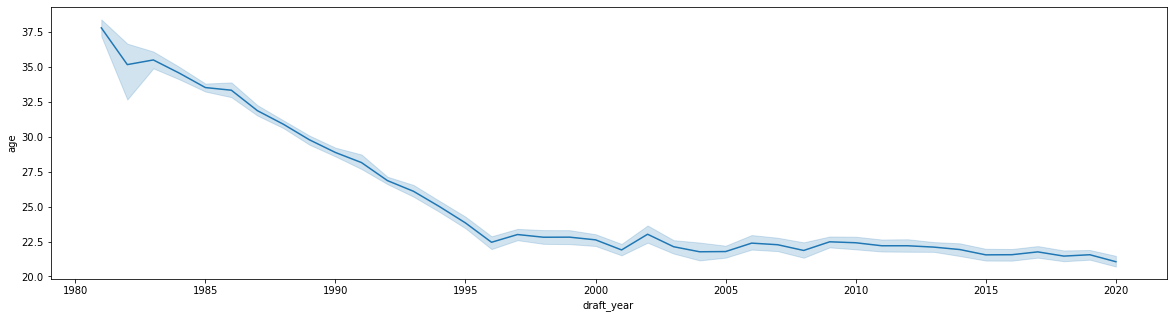

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(x='draft_year',y='age',data=country1.iloc[8:])
plt.ticklabel_format(style='plain')

Finally, a box plot was selected for this visualization to analyze the variation over the years

In [20]:
import plotly.express as px
fig = px.box(country1[8:], x="draft_year", y="age", title="Ages of NBA Draft Picks, 1981 - 2020")
fig.show()

<div class="alert alert-warning" color=black>We could now clearly observe that there was a drop in average age of drafted players
from 38 in 1981 to 21 in 2020. We also observed that the youngest age at which any player was
drafted into the NBA was 18 for the year of 1996 and 2005. Further, we observed that from the
year of 2010, the minimum age of drafted players for each consecutive year was 19.

# 4. Analyzing all the First Picks in the NBA from 1952-2020

In [21]:
first_pick = pd.read_csv("../input/ncaa-to-nba-transition-for-2019-draft/first_picks_nba.csv")
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman[f],Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix^[g],Guard/Forward,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy^,Forward/Center,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts[h],Guard/Forward,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green[i],Guard/Forward,Duquesne,11.5,5.2,3.6


The dataset requires a bit of cleaning for the **player** column

In [22]:
first_pick['player']=first_pick['player'].str.split("^").str[0]
first_pick['player']=first_pick['player'].str.split("[").str[0]
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix,Guard/Forward,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy,Forward/Center,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts,Guard/Forward,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green,Guard/Forward,Duquesne,11.5,5.2,3.6


The **position** column contains the *primary* and *secondary* position of the player. We will only consider the primary one.

In [23]:
first_pick['position']=first_pick['position'].str.split('/').str[0]
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix,Guard,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy,Forward,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts,Guard,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green,Guard,Duquesne,11.5,5.2,3.6


In [24]:
first_pick = first_pick.astype({'draft': 'object'})
first_pick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   draft        69 non-null     object 
 1   selected_by  69 non-null     object 
 2   player       69 non-null     object 
 3   position     69 non-null     object 
 4   college      69 non-null     object 
 5   PPG          69 non-null     float64
 6   RPG          69 non-null     float64
 7   APG          69 non-null     float64
dtypes: float64(3), object(5)
memory usage: 4.4+ KB


In [25]:
first_pick['player']= first_pick['player'].astype(str) +"-"+ first_pick['draft'].astype(str)
first_pick.head()

,draft,selected_by,player,position,college,PPG,RPG,APG
0,1952,Milwaukee Hawks,Mark Workman-1952,Center,West Virginia,5.1,3.0,0.6
1,1953,Baltimore Bullets,Ray Felix-1953,Guard,Long Island,17.6,13.3,1.1
2,1954,Baltimore Bullets,Frank Selvy-1954,Forward,Furman,19.0,5.5,3.5
3,1955,Milwaukee Hawks,Dick Ricketts-1955,Guard,Duquesne,8.9,7.2,3.0
4,1956,Rochester Royals,Sihugo Green-1956,Guard,Duquesne,11.5,5.2,3.6


<AxesSubplot:xlabel='position', ylabel='Count'>

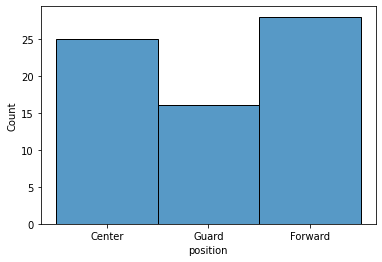

In [26]:
sns.histplot(data=first_pick, x="position")

In [27]:
fig = px.bar(first_pick, y="player", x=["PPG", "APG", "RPG"], title="First Picks since 1952",width=1000, height=1500, labels=dict(player="Player Name"))
fig.show()

<div class="alert alert-warning" color=black>Overall, most of the first picks lived up to their standards averaging about 20 points per
game. Though few players perform so poorly, as fans, we tend to doubt the management
decisions made by franchises. Since the management changes once in every 10 years, we will
take a look at the last 10-year drafts.

In [28]:
first_pick_10=first_pick[-10:]

In [29]:
fig = go.Figure(data=[
    go.Bar(name='Points Per Game', x=first_pick_10['player'], y=first_pick_10['PPG'],),
    go.Bar(name='Points Per Game', x=first_pick_10['player'], y=first_pick_10['APG']),
    go.Bar(name='Rebounds Per Game', x=first_pick_10['player'], y=first_pick_10['RPG'],  marker_color = 'black')])
fig.update_layout(barmode='group',title="First pick over the last 10 years")

fig.show()

<div class="alert alert-warning" color=black>Clearly, we see a lot of busts and that almost every 4 years we see this trend repeating.
How can the player go from BEST to BUST. There can be various reasons for this unusual and
unpredictable trend. Either the player was never that good, the player did not fit into the team
or the team made a bad decision. We, as data visualizers, have less control over the first and
third reason but we can definitely predict the second point about whether the player was a
good fit to the team.

### *For this, let’s take a look at the 2019 Draft class and try to draw insights from them.*

# 5. Overall Change in Performance of 10 players from NCAA to NBA transition


In [30]:
df0 = pd.read_csv("../input/ncaa-to-nba-transition-for-2019-draft/Data1.csv")
df0

,Player,League,PPG,RPG,APG
0,Cody Martin,NCAA,13.1,5.4,4.8
1,Cody Martin,NBA,5.0,3.4,1.9
2,De'Andre Hunter,NCAA,12.2,4.3,1.6
3,De'Andre Hunter,NBA,12.8,4.4,1.7
4,Dylan Windler,NCAA,19.3,10.0,1.6
5,Dylan Windler,NBA,4.4,2.9,1.1
6,Ja Morant,NCAA,24.5,5.7,10.0
7,Ja Morant,NBA,19.2,4.1,7.3
8,Jarrett Culver,NCAA,14.9,5.6,2.8
9,Jarrett Culver,NBA,7.6,3.1,1.3


In [31]:
df0.set_index(['Player', 'League'], inplace=True)
df0

PPG   RPG   APG
Player          League                  
Cody Martin     NCAA    13.1   5.4   4.8
                NBA      5.0   3.4   1.9
De'Andre Hunter NCAA    12.2   4.3   1.6
                NBA     12.8   4.4   1.7
Dylan Windler   NCAA    19.3  10.0   1.6
                NBA      4.4   2.9   1.1
Ja Morant       NCAA    24.5   5.7  10.0
                NBA     19.2   4.1   7.3
Jarrett Culver  NCAA    14.9   5.6   2.8
                NBA      7.6   3.1   1.3
Jordan Poole    NCAA     9.5   2.2   1.4
                NBA     11.7   2.1   2.3
RJ Barrett      NCAA    22.6   7.6   4.3
                NBA     15.9   5.5   2.7
Romeo Langford  NCAA    16.5   5.4   2.3
                NBA      3.2   1.9   0.5
Tyler Herro     NCAA    14.0   4.5   2.5
                NBA     15.4   4.7   3.0
Zion Williamson NCAA    22.6   8.9   2.1
                NBA     25.7   7.0   3.2

In [32]:
df0 = df0.unstack(level = 1)
df0

PPG        RPG        APG      
League            NBA  NCAA  NBA  NCAA  NBA  NCAA
Player                                           
Cody Martin       5.0  13.1  3.4   5.4  1.9   4.8
De'Andre Hunter  12.8  12.2  4.4   4.3  1.7   1.6
Dylan Windler     4.4  19.3  2.9  10.0  1.1   1.6
Ja Morant        19.2  24.5  4.1   5.7  7.3  10.0
Jarrett Culver    7.6  14.9  3.1   5.6  1.3   2.8
Jordan Poole     11.7   9.5  2.1   2.2  2.3   1.4
RJ Barrett       15.9  22.6  5.5   7.6  2.7   4.3
Romeo Langford    3.2  16.5  1.9   5.4  0.5   2.3
Tyler Herro      15.4  14.0  4.7   4.5  3.0   2.5
Zion Williamson  25.7  22.6  7.0   8.9  3.2   2.1

In [33]:
cols = list(df0.columns)
cols.reverse()
df0 = df0[cols]
df0

APG        RPG        PPG      
League           NCAA  NBA  NCAA  NBA  NCAA   NBA
Player                                           
Cody Martin       4.8  1.9   5.4  3.4  13.1   5.0
De'Andre Hunter   1.6  1.7   4.3  4.4  12.2  12.8
Dylan Windler     1.6  1.1  10.0  2.9  19.3   4.4
Ja Morant        10.0  7.3   5.7  4.1  24.5  19.2
Jarrett Culver    2.8  1.3   5.6  3.1  14.9   7.6
Jordan Poole      1.4  2.3   2.2  2.1   9.5  11.7
RJ Barrett        4.3  2.7   7.6  5.5  22.6  15.9
Romeo Langford    2.3  0.5   5.4  1.9  16.5   3.2
Tyler Herro       2.5  3.0   4.5  4.7  14.0  15.4
Zion Williamson   2.1  3.2   8.9  7.0  22.6  25.7

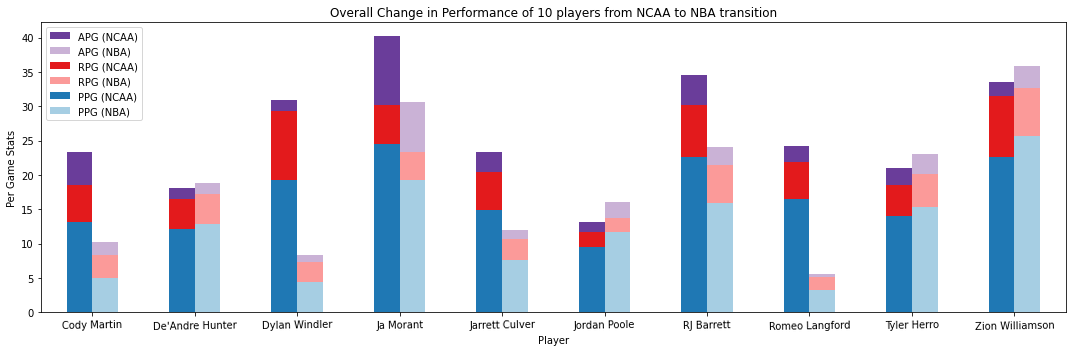

In [34]:
cmap = plt.cm.Paired.colors

fig, ax = plt.subplots(figsize=(15, 5))

(df0['APG']+df0['RPG']+df0['PPG']).plot(kind='bar', color=[cmap[9], cmap[8]], rot=1, ax=ax)
(df0['RPG']+df0['PPG']).plot(kind='bar', color=[cmap[5], cmap[4]], rot=1, ax=ax)
df0['PPG'].plot(kind='bar', color=[cmap[1], cmap[0]], rot=1, ax=ax)

legend_labels = [f'{val} ({context})' for val, context in df0.columns]
ax.legend(legend_labels)

plt.title("Overall Change in Performance of 10 players from NCAA to NBA transition")
plt.ylabel("Per Game Stats")
plt.tight_layout()
plt.show()

<div class="alert alert-warning" color=black>As can clearly be observed from above, the performance of four players, namely Cody Martin, Dylan Windler, Jarrett Culver and Romeo Langford, fell drastically. Ja Morant and RJ Barrett also experienced a drop in performance, but this was relatively not as low compared to the performance of most players in both NCAA and NBA. The performance of De’Andre Hunter remained relatively unaffected. However, three players, Jordan Poole, Tyler Herro and Zion Williamson actually performed much better in their first season of the NBA as compared to their performance in the NCAA. Of these three, Zion Williamson was in fact the 1st draft pick in the 2019 season, Tyler Herro was the overall 13th pick, whereas Jordan Poole was the 28th pick, now considered a sleeper pick.

# 5. Comparing 1st round picks VS 2nd round picks

In [35]:
import chardet
with open("../input/ncaa-to-nba-transition-for-2019-draft/2019_Draft.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [36]:
draft = pd.read_csv("../input/ncaa-to-nba-transition-for-2019-draft/2019_Draft.csv",encoding='ISO-8859-1')
draft.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP.1,PPG_NBA,RPG_NBA,APG_NBA,WS,WS/48,BPM,VORP
0,1,1,NOP,Zion Williamson,Duke,2.0,85.0,2694.0,2187.0,591.0,...,0.333,0.683,31.7,25.7,7.0,3.2,10.6,0.189,4.6,4.5
1,2,2,MEM,Ja Morant,Murray State,3.0,149.0,4746.0,2855.0,617.0,...,0.323,0.754,31.9,19.2,4.1,7.3,8.8,0.089,0.2,2.7
2,3,3,NYK,RJ Barrett,Duke,3.0,149.0,4871.0,2362.0,817.0,...,0.361,0.684,32.7,15.9,5.5,2.7,3.8,0.038,-2.9,-1.1
3,4,4,LAL,De'Andre Hunter,Virginia,3.0,97.0,3002.0,1241.0,426.0,...,0.352,0.782,30.9,12.8,4.4,1.7,1.8,0.028,-3.5,-1.2
4,5,5,CLE,Darius Garland,Vanderbilt,3.0,133.0,4307.0,2039.0,292.0,...,0.371,0.856,32.4,15.3,2.2,5.3,1.2,0.014,-3.0,-1.1


In [37]:
draft['Pk'].astype('int', errors='ignore')
draft = draft.astype({'Pk': 'str'})
draft['Player'] = draft['Player'] +" - "+ "pick no." + draft['Pk']
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       60 non-null     int64  
 1   Pk       60 non-null     object 
 2   Tm       60 non-null     object 
 3   Player   60 non-null     object 
 4   College  52 non-null     object 
 5   Yrs      58 non-null     float64
 6   G        58 non-null     float64
 7   MP       58 non-null     float64
 8   PTS      58 non-null     float64
 9   TRB      58 non-null     float64
 10  AST      58 non-null     float64
 11  FG%      58 non-null     float64
 12  3P%      57 non-null     float64
 13  FT%      56 non-null     float64
 14  MP.1     58 non-null     float64
 15  PPG_NBA  58 non-null     float64
 16  RPG_NBA  58 non-null     float64
 17  APG_NBA  58 non-null     float64
 18  WS       58 non-null     float64
 19  WS/48    58 non-null     float64
 20  BPM      58 non-null     float64
 21  VORP     58 non-nu

Dropping null values

In [38]:
draft = draft.dropna()
draft.shape

(49, 22)

In [39]:
first_round = draft[:30]
second_round = draft[30:]

In [40]:
import plotly.express as px

fig = px.bar(first_round, x="Player", y=["PPG_NBA", "APG_NBA", "RPG_NBA"], title="First round picks with PPG,APG,RPG stacked", color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(yaxis_range=[0,40])
fig.show()

In [41]:
fig = px.bar(second_round, x="Player", y=["PPG_NBA", "APG_NBA", "RPG_NBA"], title="Second round picks with PPG,APG,RPG stacked", hover_data=['Tm'], color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(yaxis_range=[0,40])
fig.show()

<p><div class="alert alert-warning" color=black>We can see that overall the first round picks performed as expected and have better overalls than second round but there are a few players that have scored lower than second rounds picks. It's weird that 6th, 8th and 14th pick.... have not met their expectations while the 41st, 45th and 46th pick have performed better.<\div>
<br><\p>
  

# 5. Top 10 performing players

In [42]:
draft['Cumulative'] = draft["PPG_NBA"] + draft["APG_NBA"] + draft["RPG_NBA"]
draft.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,FT%,MP.1,PPG_NBA,RPG_NBA,APG_NBA,WS,WS/48,BPM,VORP,Cumulative
0,1,1,NOP,Zion Williamson - pick no.1,Duke,2.0,85.0,2694.0,2187.0,591.0,...,0.683,31.7,25.7,7.0,3.2,10.6,0.189,4.6,4.5,35.9
1,2,2,MEM,Ja Morant - pick no.2,Murray State,3.0,149.0,4746.0,2855.0,617.0,...,0.754,31.9,19.2,4.1,7.3,8.8,0.089,0.2,2.7,30.6
2,3,3,NYK,RJ Barrett - pick no.3,Duke,3.0,149.0,4871.0,2362.0,817.0,...,0.684,32.7,15.9,5.5,2.7,3.8,0.038,-2.9,-1.1,24.1
3,4,4,LAL,De'Andre Hunter - pick no.4,Virginia,3.0,97.0,3002.0,1241.0,426.0,...,0.782,30.9,12.8,4.4,1.7,1.8,0.028,-3.5,-1.2,18.9
4,5,5,CLE,Darius Garland - pick no.5,Vanderbilt,3.0,133.0,4307.0,2039.0,292.0,...,0.856,32.4,15.3,2.2,5.3,1.2,0.014,-3.0,-1.1,22.8


In [43]:
draft = draft.sort_values("Cumulative", ascending=False)

In [44]:
fig = px.bar(draft[:10], x="Player", y=["PPG_NBA", "APG_NBA", "RPG_NBA"], title=" Top 10 performing players", hover_data=['Tm','Pk'], color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(yaxis_range=[0,40])
fig.show()

# 6. Stat Leaders

In [45]:
rookie = pd.read_csv("../input/ncaa-to-nba-transition-for-2019-draft/rookie.csv")
rookie.head()

,R#,PLAYER,POS,TEAM,GP,MPG,FG%,FT%,3PM,PTS,TREB,AST,STL,BLK,TO,TOTAL
0,1,Ja Morant,PG,MEM,67,31.0,0.477 ...,0.776 ...,0.9 bavg (i) -0.6548349531 (i),17.8 good (i) 0.9016120232 (i),3.9 bavg (i) -0.3700238126 (i),7.3 elite (i) 2.6598161628 (i),0.9 (i) 0.2591738261 (i),0.3 (i) -0.2376298269 (i),3.3 ngood (i) 2.3472726015 (i),2.49
1,2,Brandon Clarke,"PF,C",MEM,58,22.4,0.621 ...,0.759 ...,0.4 ngood (i) -1.2395090183 (i),12.1 (i) -0.0161002147 (i),5.9 (i) 0.4522513265 (i),1.4 bavg (i) -0.6791019990 (i),0.6 bavg (i) -0.5183476522 (i),0.8 good (i) 0.9505193077 (i),0.9 good (i) -0.6177033162 (i),1.63
2,3,Kendrick Nunn,"PG,SG",MIA,67,29.3,0.439 ...,0.850 ...,2.0 good (i) 0.6782219157 (i),15.3 (i) 0.4991066557 (i),2.7 bavg (i) -0.8633888961 (i),3.3 (i) 0.3961428328 (i),0.8 (i) 0.0000000000 (i),0.2 bavg (i) -0.4752596539 (i),1.7 (i) 0.3706219897 (i),0.06
3,4,P.J. Washington,"SF,PF",CHA,58,30.3,0.455 ...,0.652 ...,1.5 (i) 0.0233869626 (i),12.2 (i) 0.0000000000 (i),5.4 (i) 0.2466825417 (i),2.1 bavg (i) -0.2829591663 (i),0.9 (i) 0.2591738261 (i),0.8 good (i) 0.9505193077 (i),1.6 (i) 0.2470813265 (i),-0.07
4,5,Zion Williamson,PF,NOP,24,27.8,0.583 ...,0.640 ...,0.3 ngood (i) -1.4149112378 (i),22.5 vgood (i) 1.6583221140 (i),6.3 good (i) 0.6167063543 (i),2.1 bavg (i) -0.2829591663 (i),0.7 bavg (i) -0.2591738261 (i),0.4 (i) 0.0000000000 (i),2.5 bavg (i) 1.3589472956 (i),-0.29


In [46]:
rookie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R#      43 non-null     int64  
 1   PLAYER  43 non-null     object 
 2   POS     42 non-null     object 
 3   TEAM    43 non-null     object 
 4   GP      43 non-null     int64  
 5   MPG     43 non-null     float64
 6   FG%     43 non-null     object 
 7   FT%     43 non-null     object 
 8   3PM     43 non-null     object 
 9   PTS     43 non-null     object 
 10  TREB    43 non-null     object 
 11  AST     43 non-null     object 
 12  STL     43 non-null     object 
 13  BLK     43 non-null     object 
 14  TO      43 non-null     object 
 15  TOTAL   43 non-null     float64
dtypes: float64(2), int64(2), object(12)
memory usage: 5.5+ KB


In [47]:
rookie['3PM'] = rookie['3PM'].str.split(" ").str[0]
rookie['PTS'] = rookie['PTS'].str.split(" ").str[0]
rookie['TREB'] = rookie['TREB'].str.split(" ").str[0]
rookie['AST'] = rookie['AST'].str.split(" ").str[0]
rookie['STL'] = rookie['STL'].str.split(" ").str[0]
rookie['BLK'] = rookie['BLK'].str.split(" ").str[0]
rookie['TO'] = rookie['TO'].str.split(" ").str[0]
rookie['FG%'] = rookie['FG%'].str.split(" ").str[0]
rookie['FT%'] = rookie['FT%'].str.split(" ").str[0]
rookie.head()

,R#,PLAYER,POS,TEAM,GP,MPG,FG%,FT%,3PM,PTS,TREB,AST,STL,BLK,TO,TOTAL
0,1,Ja Morant,PG,MEM,67,31.0,0.477,0.776,0.9,17.8,3.9,7.3,0.9,0.3,3.3,2.49
1,2,Brandon Clarke,"PF,C",MEM,58,22.4,0.621,0.759,0.4,12.1,5.9,1.4,0.6,0.8,0.9,1.63
2,3,Kendrick Nunn,"PG,SG",MIA,67,29.3,0.439,0.850,2.0,15.3,2.7,3.3,0.8,0.2,1.7,0.06
3,4,P.J. Washington,"SF,PF",CHA,58,30.3,0.455,0.652,1.5,12.2,5.4,2.1,0.9,0.8,1.6,-0.07
4,5,Zion Williamson,PF,NOP,24,27.8,0.583,0.640,0.3,22.5,6.3,2.1,0.7,0.4,2.5,-0.29


In [48]:
rookie = rookie.astype({'3PM': 'float64', 'FG%': 'float64', 'FT%': 'float64', 'PTS': 'float64', 'TREB': 'float64', 'AST': 'float64', 'STL': 'float64'})

In [49]:
PPG_leaders = rookie.sort_values(by=['PTS'], ascending = False)
PPG_leaders = PPG_leaders[:10]

APG_leaders = rookie.sort_values(by=['AST'], ascending = False)
APG_leaders = APG_leaders[:10]

TREB_leaders = rookie.sort_values(by=['TREB'], ascending = False)
TREB_leaders = TREB_leaders[:10]

STL_leaders = rookie.sort_values(by=['STL'], ascending = False)
STL_leaders = STL_leaders[:10]

BLK_leaders = rookie.sort_values(by=['BLK'], ascending = False)
BLK_leaders = BLK_leaders[:10]

TO_leaders = rookie.sort_values(by=['TO'] , ascending = False)
TO_leaders = TO_leaders[:10]

In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2,  subplot_titles = ("Points Leaders", 'Assist Leaders', 'Rebound Leaders', 'Steals Leaders', 'Blocks Leaders', 'Turnover Leaders'))

# Subplot 1
fig.add_trace(go.Bar(name = "PPG_leaders", x=PPG_leaders["PLAYER"], y=PPG_leaders["PTS"]),row=1,col=1)

# Subplot 2
fig.add_trace(go.Bar(name = "APG_leaders", x=APG_leaders["PLAYER"], y=APG_leaders["AST"]),row=2,col=1)

# Subplot 3
fig.add_trace(go.Bar(name = "TREB_leaders", x=TREB_leaders["PLAYER"], y=TREB_leaders["TREB"]),row=3,col=1)

# Subplot 4
fig.add_trace(go.Bar(name = "STL_leaders", x=STL_leaders["PLAYER"], y=STL_leaders["STL"]),row=1,col=2)

# Subplot 5
fig.add_trace(go.Bar(name = "BLK_leaders", x=BLK_leaders["PLAYER"], y=BLK_leaders["BLK"],),row=2,col=2)

# Subplot 6
fig.add_trace(go.Bar(name = "TO_leaders", x=TO_leaders["PLAYER"], y=TO_leaders["TO"]),row=3,col=2)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200)


fig.show()


# 

## Now, Let's do an interesting Analysis on #13 Pick Tyler Herro.

We will need to load both **NCAA** and **NBA** datasets for the 2019 draft players and analyse their transition.

## 7. Case Study : Tyler Herro

The * 'asterics' next to the *team_name* indicates the team made it to the playoffs

In [51]:
ncaa_df = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/2019_NCAA.csv')
ncaa_df.head()

,Player,Age,PPG_NCAA,RPG_NCAA,APG_NCAA,SPG,BPG,TOPG,3PT,TS%
0,Zion Williamson,19.0,22.6,8.9,2.1,2.1,1.8,NaN,3.380,NaN
1,Ja Morant,19.0,24.5,5.7,10.0,1.8,0.8,5.2,0.363,0.612
2,RJ Barrett,19.0,22.6,7.6,4.3,0.9,0.4,3.2,1.900,0.532
3,De'Andre Hunter,21.5,12.2,4.3,1.6,0.6,0.5,1.2,0.900,0.601
4,Jarrett Culver,20.3,14.9,5.6,2.8,1.3,0.6,2.1,1.400,0.551


Zion Williamson and Ja Morant have some missing stats, let's add them manually

In [52]:
df2 = {'Player': 'Zion Williamson', 'Age': 19, 'PPG_NCAA': 22.6, 'RPG_NCAA': 8.9, 'APG_NCAA': 2.1, 'SPG': 2.1, 'BPG': 1.8, 'TOPG': 2.4,'3PT': 0.7,'TS%': 0.702}
df3 = {'Player': 'Ja Morant', 'Age': 19, 'PPG_NCAA': 24.5, 'RPG_NCAA': 5.7, 'APG_NCAA': 10.0, 'SPG': 1.8, 'BPG': 0.8,'TOPG': 5.2,'3PT': 0.363,'TS%': 0.612}

In [53]:
ncaa_df = ncaa_df.append(df2,ignore_index=True)
ncaa_df = ncaa_df.append(df3,ignore_index=True)
ncaa_df = ncaa_df.fillna(method='ffill')

In [54]:
nba_df = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/all_seasons.csv')
nba_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [55]:
team_18_19_df = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/teams_stat_18_19.csv')
team_18_19_df.head()

,Rk,Team▼,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Washington Wizards*,82,242.1,39.9,85.6,.467,9.9,26.5,.375,...,.772,10.0,33.1,43.1,25.2,7.9,4.3,14.6,21.3,106.6
1,2,Utah Jazz*,82,240.9,38.3,82.9,.462,10.8,29.6,.366,...,.779,9.0,34.2,43.3,22.4,8.6,5.1,14.7,19.6,104.1
2,3,Toronto Raptors*,82,241.8,41.3,87.4,.472,11.8,33.0,.358,...,.794,9.8,34.2,44.0,24.3,7.6,6.1,13.4,21.7,111.7
3,4,San Antonio Spurs*,82,240.6,39.0,85.4,.457,8.5,24.1,.352,...,.772,10.4,33.9,44.2,22.8,7.7,5.6,13.1,17.2,102.7
4,5,Sacramento Kings,82,240.9,38.8,86.1,.450,9.0,24.0,.375,...,.735,9.5,31.4,40.9,21.6,7.8,4.1,13.7,20.0,98.8


In [56]:
team_18_19_df = team_18_19_df.rename({'Team▼' : 'Team'}, axis=1)

In [57]:
team_19_20_df = pd.read_csv('../input/ncaa-to-nba-transition-for-2019-draft/team_stats_19_20.csv')
team_19_20_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Milwaukee Bucks*,73,241.0,43.3,90.9,.476,13.8,38.9,.355,...,.742,9.5,42.2,51.7,25.9,7.2,5.9,15.1,19.6,118.7
1,2,Houston Rockets*,72,241.4,40.8,90.4,.451,15.6,45.3,.345,...,.791,9.8,34.5,44.3,21.6,8.7,5.2,14.7,21.8,117.8
2,3,Dallas Mavericks*,75,242.3,41.7,90.3,.461,15.1,41.3,.367,...,.779,10.5,36.4,46.9,24.7,6.1,4.8,12.7,19.5,117.0
3,4,Los Angeles Clippers*,72,241.4,41.6,89.2,.466,12.4,33.5,.371,...,.791,10.7,37.0,47.7,23.7,7.1,4.7,14.6,22.1,116.3
4,5,New Orleans Pelicans,72,242.1,42.6,91.6,.465,13.6,36.9,.370,...,.729,11.1,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8


In [58]:
stat_list = ['Team','TRB','AST','STL','BLK','PTS']
stat_list1 = ['TRB','AST','STL','BLK','PTS']

In [59]:
team_18_19_df = team_18_19_df[stat_list]
team_18_19_df.head()

,Team,TRB,AST,STL,BLK,PTS
0,Washington Wizards*,43.1,25.2,7.9,4.3,106.6
1,Utah Jazz*,43.3,22.4,8.6,5.1,104.1
2,Toronto Raptors*,44.0,24.3,7.6,6.1,111.7
3,San Antonio Spurs*,44.2,22.8,7.7,5.6,102.7
4,Sacramento Kings,40.9,21.6,7.8,4.1,98.8


In [60]:
team_19_20_df = team_19_20_df[stat_list]
team_19_20_df.head()

,Team,TRB,AST,STL,BLK,PTS
0,Milwaukee Bucks*,51.7,25.9,7.2,5.9,118.7
1,Houston Rockets*,44.3,21.6,8.7,5.2,117.8
2,Dallas Mavericks*,46.9,24.7,6.1,4.8,117.0
3,Los Angeles Clippers*,47.7,23.7,7.1,4.7,116.3
4,New Orleans Pelicans,46.5,26.8,7.5,5.0,115.8


In [61]:
categories = ['Total Rebounds','Assists','Steals',
              'Blocks', 'Points']

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
team_18_19_df = team_18_19_df[team_18_19_df['TRB'] != 'TRB']
team_19_20_df = team_19_20_df[team_19_20_df['TRB'] != 'TRB']

In [64]:
n_18_19 = scaler.fit_transform(team_18_19_df[stat_list1])
normalized_18_19 = pd.DataFrame(data = n_18_19,columns = stat_list1)

n_19_20 = scaler.fit_transform(team_19_20_df[stat_list1])
normalized_19_20 = pd.DataFrame(data = n_19_20,columns = stat_list1)

In [65]:
stat_list_ = ['Player','PPG_NCAA', 'RPG_NCAA', 'APG_NCAA', 'SPG', 'BPG']
stat_list_1 = ['PPG_NCAA', 'RPG_NCAA', 'APG_NCAA', 'SPG', 'BPG']

## We normalize datasets of the teams and players seperately. This way, every team can be compared with each other and choose players out of pool of the nroamlized draft players.

In [66]:
n_ncaa_df = scaler.fit_transform(ncaa_df[stat_list_1])
normalized_ncaa_df = pd.DataFrame(data = n_ncaa_df,columns = stat_list_1)
normalized_ncaa_df = normalized_ncaa_df[['RPG_NCAA','APG_NCAA','SPG','BPG','PPG_NCAA']]

In [67]:
normalized_ncaa_df['Player'] = ncaa_df['Player']
normalized_18_19['Team'] = team_18_19_df['Team']
normalized_19_20['Team'] = team_19_20_df['Team']

In [68]:
stats_tyler = normalized_ncaa_df[normalized_ncaa_df['Player'] == 'Tyler Herro']

In [69]:
np.array(stats_tyler.iloc[0,0:-1])

array([0.2948717948717949, 0.1935483870967742, 0.22222222222222227,
       0.16666666666666666, 0.30000000000000004], dtype=object)

In [70]:
def plot_21trace_radar(a,n):
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
      r = a[0:-1],
      theta=categories,
      fill='toself',
      name = a[-1]
    ))
    fig.add_trace(go.Scatterpolar(
      r = np.array(n[0:-1]),
      theta=categories,
      fill='toself',
      name=n[-1]
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.show()


In [71]:
np.array(normalized_18_19.iloc[0])

array([0.43421052631579027, 0.5816326530612244, 0.5862068965517242,
       0.19999999999999996, 0.5306122448979584, 'Washington Wizards*'],
      dtype=object)

In [72]:
normalized_18_19.dropna(inplace=True)
normalized_18_19 = normalized_18_19.reset_index(drop=True)

normalized_19_20.dropna(inplace=True)
normalized_19_20 = normalized_19_20.reset_index(drop=True)

## Here we compare Tyler Herro to different teams and superimpose the player and team stats to analyse which player would be the best fit for the team or vice versa.

## Because it is more important for the player to fit a team rather than the team getting the best player.

## We will show why in the next section.

In [73]:
for i in range(0,30):
    plot_21trace_radar(np.array(normalized_18_19.iloc[i]),stats_tyler.iloc[0])

We can see from the above radar graphs that Tyler Herro would have been a great fit for Chicago Bulls or Cleveland Cavaliers. This is evident from the superimposed radar charts as the charts clearly show that the Bulls lack in the department of Assists and Points whereas Cavaliers lack in Rebounds and Points, metrics which happen to be strong suits of this particular player. Moreover, these teams had a pick before Miami Heat that eventually drafted the player. Tyler Herro was drafted to the Miami Heat in the end. We can see from the Miami heat chart that although the 2 radar traces overlap closely, Tyler Herro would likely boost their points numbers.
Let us look at Miami Heat's performance in 2019/20 to see how Tyler's addition affects their performance.

In [74]:
def plot_2trace_radar(a,n,t):
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
      r = a[0:-1],
      theta=categories,
      fill='toself',
      name = a[-1]
    ))
    fig.add_trace(go.Scatterpolar(
      r = np.array(n[0:-1]),
      theta=categories,
      fill='toself',
      name=n[-1]
    ))

    fig.update_layout(
      title = t,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.show()

In [75]:
def plot_2trace_spec_radar(a,b,t):
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
      r = a[0:-1],
      theta=categories,
      fill='toself',
      name = a[-1] + '18'
    ))
    
    fig.add_trace(go.Scatterpolar(
      r = b[0:-1],
      theta=categories,
      fill='toself',
      name= b[-1] + '19'
    ))

    fig.update_layout(
      title = t,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.show()

In [76]:
a = np.array(normalized_18_19[normalized_18_19['Team'] == 'Miami Heat*'].iloc[0])
b = np.array(normalized_19_20[normalized_19_20['Team'] == 'Miami Heat*'].iloc[0])

In [77]:
i = np.array(normalized_18_19[normalized_18_19['Team'] == 'Chicago Bulls'].iloc[0])
j = np.array(normalized_18_19[normalized_18_19['Team'] == 'Cleveland Cavaliers*'].iloc[0])

# We will analyse the teams that could have picked Tyler Herro before the Miami Heat picked him at #13

## Chicago Bulls had the #6 Pick and selected Coby White but they could have picked Tyler Herro and helped them strengthen their core as well as improve their Block stats

In [78]:
plot_2trace_radar(i,stats_tyler.iloc[0],'Best Fit Check: Tyler Herro and Chicago Bulls')

In [79]:
plot_2trace_radar(j,stats_tyler.iloc[0],'Best Fit Check: Tyler Herro and Cleveland Cavaliers')

## But the Miami Heat ended up picking Tyler Herro at #13 pick and strengthened their Core.

In [80]:
plot_2trace_radar(a,stats_tyler.iloc[0],'Best Fit Check: Tyler Herro and Miami Heat')

<p><div class="alert alert-warning" color=black>Now we can see how the addition of Tyler Herro increased their overall Stats. With the help of Jimmy Butler, the were able to go undefeated to the NBA 2019 finals. Clearly, if one would have followed the NBA, Tyler Herro did his part and was a very good fit to the team.

In [81]:
plot_2trace_spec_radar(a,b,'Heat18 vs Heat19')

<p><div class="alert alert-warning" color=black>We can see, that Miami's Assists and Points numbers are much better. Obviously, all the changes are not because of Tyler Herro's addition but we can see a growth in the attributes that Tyler brings to the table. Hence, maybe Miami was not the team that needed Tyler the most, but they certainly benefitted from his addition.

# 8. Now we have a deeper look at the top 3 picks adn try to understand why each team picked these players.

In [82]:
stats_RJ = normalized_ncaa_df[normalized_ncaa_df['Player'] == 'RJ Barrett']
stats_Ja = normalized_ncaa_df[normalized_ncaa_df['Player'] == 'Ja Morant']
stats_Zion = normalized_ncaa_df[normalized_ncaa_df['Player'] == 'Zion Williamson']

## Comparing top 3 picks of the 2019 draft.


In [83]:
normalized_18_19.head()

,TRB,AST,STL,BLK,PTS,Team
0,0.434211,0.581633,0.586207,0.200,0.530612,Washington Wizards*
1,0.460526,0.295918,0.827586,0.400,0.360544,Utah Jazz*
2,0.552632,0.489796,0.482759,0.650,0.877551,Toronto Raptors*
3,0.578947,0.336735,0.517241,0.525,0.265306,San Antonio Spurs*
4,0.144737,0.214286,0.551724,0.150,0.000000,Sacramento Kings


In [84]:
top3_df = normalized_18_19[(normalized_18_19['Team'] == 'New Orleans Pelicans*') | (normalized_18_19['Team'] == 'Memphis Grizzlies') | (normalized_18_19['Team'] == 'New York Knicks')]
top3_df.head()

,TRB,AST,STL,BLK,PTS,Team
10,0.552632,0.387755,0.172414,0.400,0.387755,New York Knicks
11,0.592105,0.744898,0.620690,0.600,0.877551,New Orleans Pelicans*
15,0.092105,0.204082,0.448276,0.325,0.034014,Memphis Grizzlies


# 8. Analyzing New Orleans Pelicans (picked first) against Zion Williamson (top pick), Ja Morant (second pick) and RJ Barrett (third pick).

In [85]:
plot_2trace_radar(np.array(top3_df.iloc[0]),stats_Zion.iloc[0],'Best Fit Check: Zion Williamson and New Orleans Pelican')

In [86]:
plot_2trace_radar(np.array(top3_df.iloc[0]),stats_Ja.iloc[0],'Best Fit Check: Ja Morant and New Orleans Pelican')

In [87]:
plot_2trace_radar(np.array(top3_df.iloc[0]),stats_RJ.iloc[0],'Best Fit Check: RJ Barrett and New Orleans Pelican')

### From the above 3 graphs, we can see that either Zion Williamson or Ja Morant would have been a good pick for the New Orleans Pelicans. The Pelicans opted to go for Zion, who had the best overall stats. Lets see how their choice affected their performance in 2019/20 season.

In [88]:
g = np.array(normalized_18_19[normalized_18_19['Team'] == 'New Orleans Pelicans*'].iloc[0])
h = np.array(normalized_19_20[normalized_19_20['Team'] == 'New Orleans Pelicans'].iloc[0])

In [89]:
plot_2trace_spec_radar(g,h,'Pelicans18 vs Pelicans19')

<p><div class="alert alert-warning" color=black>Although Zion felt like a good fit for the Pelicans, it looks like the Pelicans did not improve on any of the metrics that Zion Williamson excelled in the NCAA at.

# 9. Analyzing Memphis Grizzlies (picked second) against Zion Williamson (top pick), Ja Morant (second pick) and RJ Barrett (third pick)

In [90]:
plot_2trace_radar(np.array(top3_df.iloc[2]),stats_Zion.iloc[0],'Best Fit Check: Zion Williamson and Memphis Grizzlies')

In [91]:
plot_2trace_radar(np.array(top3_df.iloc[2]),stats_Ja.iloc[0],'Best Fit Check: Ja Morant and Memphis Grizzlies')

In [92]:
plot_2trace_radar(np.array(top3_df.iloc[2]),stats_RJ.iloc[0],'Best Fit Check: RJ Barrett and Memphis Grizzlies')

The Grizzlies look like they had good overall stats in 2018/19 and would benefit the most by picking Ja Morant who had good numbers when it came to assists and point per game in the NCAA. They did in fact pick Ja. We will see how Ja Morant impacted their 2019/20 season.

In [93]:
e = np.array(normalized_18_19[normalized_18_19['Team'] == 'Memphis Grizzlies'].iloc[0])
f = np.array(normalized_19_20[normalized_19_20['Team'] == 'Memphis Grizzlies'].iloc[0])

In [94]:
plot_2trace_spec_radar(e,f,'Grizzlies18 vs Grizzlies19')

<p><div class="alert alert-warning" color=black> We can see an increase in the points and drastic increase in assists, both metrics that Ja Morant promised to deliver. Therefore, we can say that this was a good pick by the Memphis Grizzlies.
Plotting New York Knicks (picked third) against Zion Williamson (top pick), Ja Morant (second pick) and RJ Barrett (third pick).

# 10. Analyzing New York Knicks(3rd Pick) against Zion Williamson, Ja Morant and RJ Barrett

In [95]:
plot_2trace_radar(np.array(top3_df.iloc[1]),stats_Zion.iloc[0],'Best Fit Check: Zion Williamson and New York Knicks')

In [96]:
plot_2trace_radar(np.array(top3_df.iloc[1]),stats_Ja.iloc[0],'Best Fit Check: Ja Morant and New York Knicks')

In [97]:
plot_2trace_radar(np.array(top3_df.iloc[1]),stats_RJ.iloc[0],'Best Fit Check: RJ Barrett and New York Knicks')

<p><div class="alert alert-warning" color=black>The New York Knicks had a really poor 2018/19 season. They would have benefitted the most from the picking Zion who has good overall stats and would improve their defense with Rebounds and Blocks and contribute in attacks with shooting. However, they had the last pick among the three teams and went for RJ Barrett. Lets see how RJ Barrett affected their performance in 2019/20 season.

In [98]:
c = np.array(normalized_18_19[normalized_18_19['Team'] == 'New York Knicks'].iloc[0])
d = np.array(normalized_19_20[normalized_19_20['Team'] == 'New York Knicks'].iloc[0])

In [99]:
plot_2trace_spec_radar(c,d,'Knicks18 vs Knicks19')

<p><div class="alert alert-warning" color=black>We can see from the Knicks' performance in 2019/20 season how badly they needed to recruit someone with good defensive attributes. Due to very few steals and rebounds, it looks like they had an even worse season in 2019/20. Looks like RJ Barrett did contribute the assists but that was pretty much it. 

In [100]:
def plot_3trace_radar(a,b,c,t):
    
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
      r = a[0:-1],
      theta=categories,
      fill='toself',
      name = a[-1]

    ))
    
    fig.add_trace(go.Scatterpolar(
      r = b[0:-1],
      theta=categories,
      fill='toself',
      name= b[-1] 
    ))

    fig.add_trace(go.Scatterpolar(
      line = dict(color = 'yellow',width = 2),
      opacity = 0.7,
      fillcolor = 'lightyellow',
      r = c[0:-1],
      theta=categories,
      fill='toself',
      name= c[-1]
    ))
        
    fig.update_layout(
      title = t,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )
    
    fig.show()

# 11. Comparison of the attributes of the first three draft picks of 2019 using a 3 trace radar chart.

In [101]:
plot_3trace_radar(stats_Zion.iloc[0],stats_Ja.iloc[0],stats_RJ.iloc[0],'Stats Comparison: Zion Williamson vs Ja Morant vs RJ Barrett')

<p><div class="alert alert-warning" color=black>We can see from the graph above that all the first three picks of the NBA 2019 draft are
great players. However, they have different strengths and weaknesses and would not be a good
fit for all the teams.
Zion has an all round game with good averages over all attributes and thus would
benefit a team that plays a balanced style rather than relying heavily on attack or defense.

Ja is great for a team looking to bolster their attacking potential as he has got great assists and
points per game attributes.
RJ Barrett on the other hand would be a good pick for a team looking at a very specific
skill set that they lack to complete their team. He has a good balance of shooting and rebound
attributes.

# RESULTS

## During the course of the project, I have used several data visualization techniques to plot and analyze data. 
#### 1. Compared draft players to other draft players.
#### 2. Checked NCAA player transitions from college to NBA and compared their success rates.
#### 3. Identified players’ potential and finding the best fit team.
#### 4. Identified "sleepers" in the draft.
#### 5. Compared overall top picks throughout the years.
#### 6. Contrast Second round pick potential over First round picks.
#### 7. Increased in International players over the years.
#### 8. Identified the biggest draft/trade mistakes made by NBA franchises.

# KEY TAKEAWAYS
#### 1. Finding the best fit player is more important than picking the best player.
#### 2. The structure of the NBA draft is not a very suitable for everyone since the bad performing teams get the best players and this could too much of a responsibility for the newly drafted 19 year old player.
#### 3. Also, the best perofming teams get the not-so-good players in the draft and this could cause the newly drafted player to get benched and then waived.
